In [1]:
import pickle

import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from FeatureExtractionPipeline import HogExtractor, SpatialBining, ColorHistogram, ColorSpaceConverter, \
    OptionalBranch, OptionalPCA, AcceptEmptyMinMaxScaler
     
%matplotlib inline

In [2]:
with open('../models/gridsearch.p', 'rb') as f:
    clf = pickle.load(f)

In [5]:
clf.best_params_

{'clf__C': 1,
 'features__chist__chist_csc__cspace': 'HLS',
 'features__chist__chist_optional__use': True,
 'features__chist__chist_pca__n_components': None,
 'features__chist__color_histogram__bins': 32,
 'features__hog__hog_csc__cspace': 'LAB',
 'features__hog__hog_extractor__cells_per_block': 2,
 'features__hog__hog_extractor__orient': 18,
 'features__hog__hog_extractor__pix_per_cell': 8,
 'features__hog__hog_pca__n_components': None,
 'features__sb__sb_csc__cspace': 'LAB',
 'features__sb__sb_optional__use': True,
 'features__sb__spatial_bining__bins': 32}

In [8]:
clf.cv_results_.keys()

dict_keys(['param_features__chist__chist_optional__use', 'param_features__chist__color_histogram__bins', 'param_clf__C', 'param_features__hog__hog_extractor__orient', 'std_train_score', 'std_score_time', 'split1_train_score', 'param_features__sb__sb_csc__cspace', 'param_features__chist__chist_pca__n_components', 'split1_test_score', 'std_fit_time', 'mean_test_score', 'split2_test_score', 'param_features__chist__chist_csc__cspace', 'param_features__hog__hog_pca__n_components', 'param_features__hog__hog_csc__cspace', 'mean_score_time', 'mean_train_score', 'param_features__hog__hog_extractor__pix_per_cell', 'split0_test_score', 'param_features__sb__sb_optional__use', 'split2_train_score', 'mean_fit_time', 'split0_train_score', 'std_test_score', 'param_features__hog__hog_extractor__cells_per_block', 'param_features__sb__spatial_bining__bins', 'rank_test_score', 'params'])

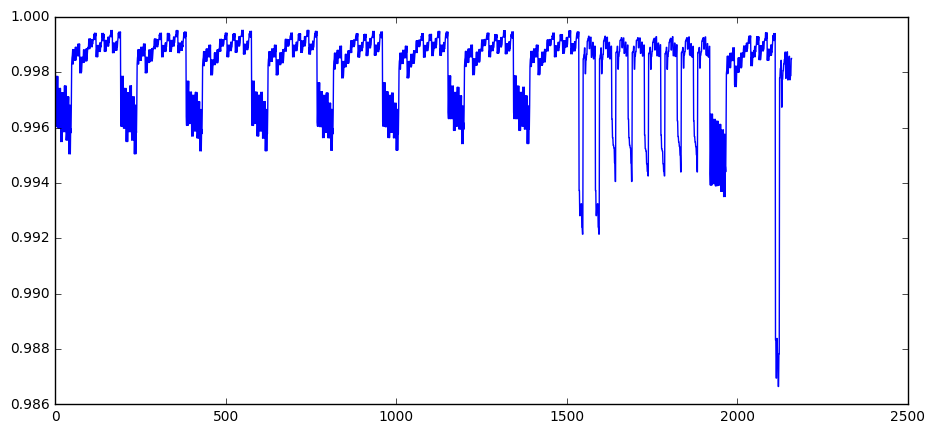

In [22]:
plt.figure(figsize=(11,5))
plt.plot(clf.cv_results_['mean_test_score'])

In [23]:
clf.cv_results_['mean_test_score'].min()

0.98664929961581238

In [24]:
clf.best_score_

0.99951835312044135

In [3]:
with open('../data/data.p', 'rb') as f:
    data = pickle.load(f)

In [4]:
X_val, y_val = data['val']

# Feature extraction result

In [28]:
clf.best_estimator_.score(X_val, y_val)

0.99227292608251927

In [31]:
pred = clf.predict(X_val)
roc_auc_score(y_val, pred)

0.99212466088380724

# C gridsearch

In [46]:
with open('../models/gridsearch_c.p', 'rb') as f:
    clf_c = pickle.load(f)

In [47]:
clf_c.best_estimator_.score(X_val, y_val)

0.99212713223501969

In [48]:
pred = clf_c.predict(X_val)
roc_auc_score(y_val, pred)

0.99193734645241205

# Retrain an complete train set

In [49]:
with open('../models/gridsearch_all_train.p', 'rb') as f:
    clf_all_train = pickle.load(f)

In [50]:
clf_all_train.best_estimator_.score(X_val, y_val)

0.99460562764251348

In [51]:
pred = clf_all_train.predict(X_val)
roc_auc_score(y_val, pred)

0.99449655808135518

# Retrain an complete train set + hrad negative mining

In [42]:
with open('../models/gridsearch_hnm.p', 'rb') as f:
    clf_hnm = pickle.load(f)

In [43]:
clf_hnm.best_estimator_.score(X_val, y_val)

0.98950284298002622

In [44]:
pred = clf_hnm.predict(X_val)
roc_auc_score(y_val, pred)

0.98921441034319713